## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

2022-11-08 01:45:52.268532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 01:45:52.316134: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
label_list = list(set(train_labels))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
label_dict = dict(zip(label_list, class_names))

In [10]:
label_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [11]:
train_labels_plt = np.vectorize(label_dict.get)(train_labels)
test_labels_plt = np.vectorize(label_dict.get)(test_labels)

In [12]:
train_labels_plt

array(['Ankle boot', 'T-shirt/top', 'T-shirt/top', ..., 'Dress',
       'T-shirt/top', 'Sandal'], dtype='<U11')

In [13]:
index_list = []
for item in class_names:
    itemindex = np.where(train_labels_plt == item)
    index_list.append(itemindex[0][0])

In [14]:
index_list

[1, 16, 5, 3, 19, 8, 18, 6, 23, 0]

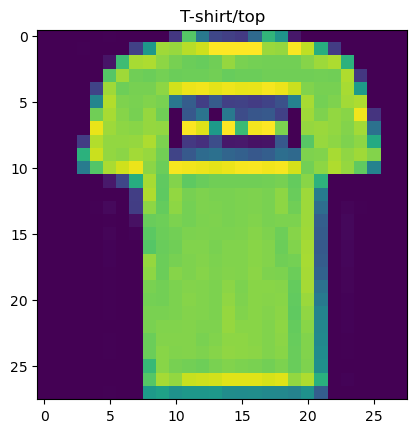

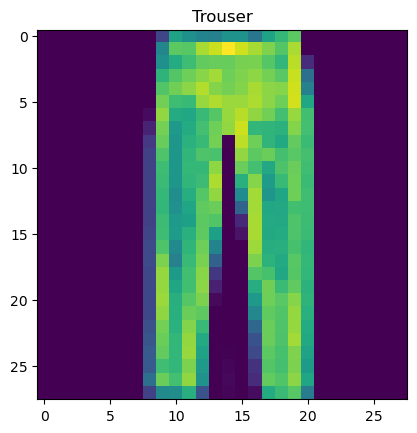

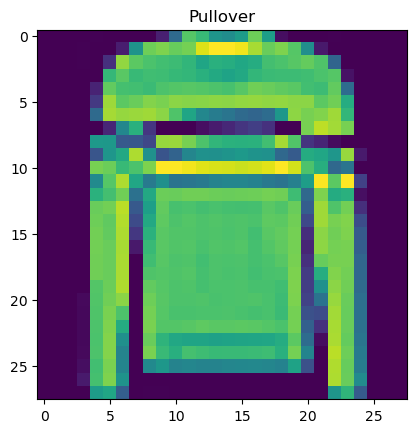

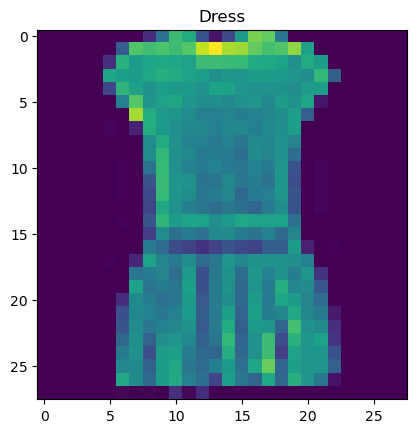

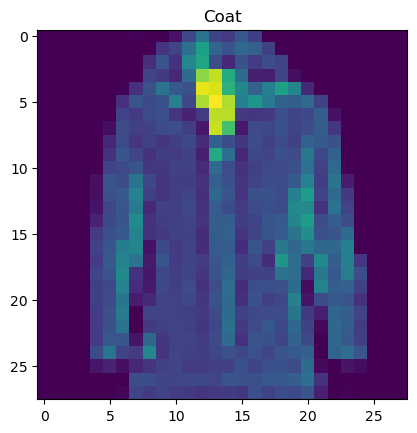

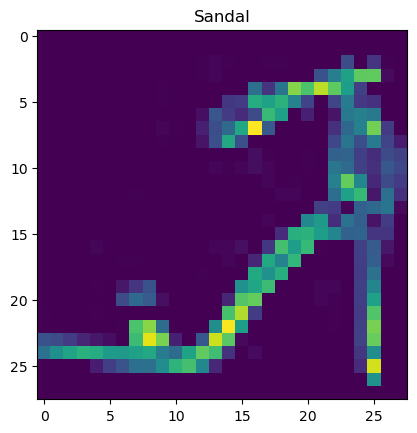

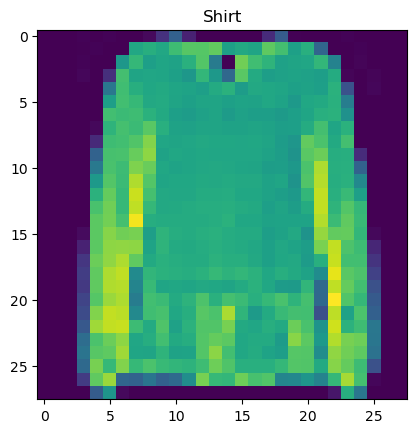

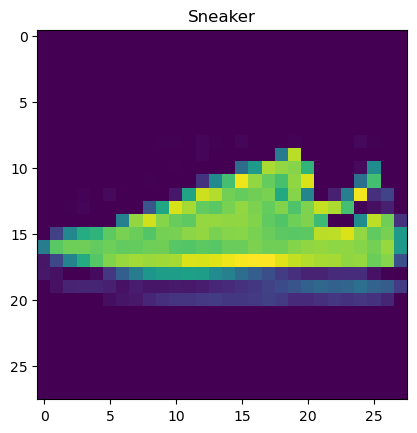

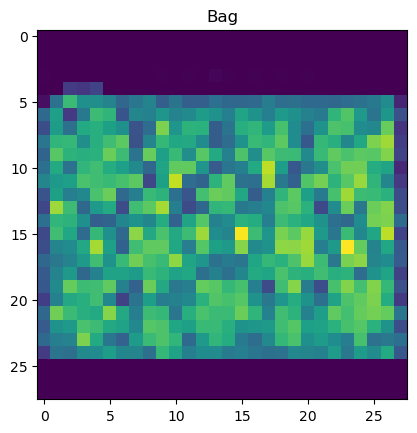

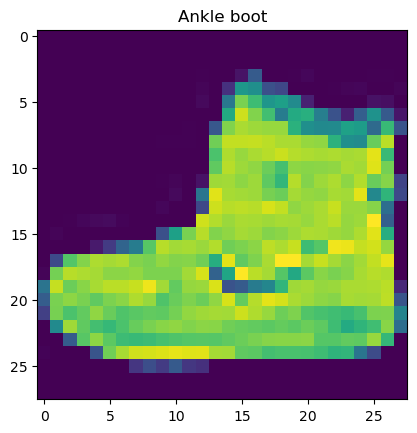

In [15]:
for i in index_list:
    plt.imshow(train_images[i])
    plt.title(train_labels_plt[i])
    plt.show()

In [16]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
# Normalize the data so that it is all within the same range. This way it will be easier for the neural network to compare different images.

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [18]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

----------------------
### Training NN model - Iteration 1

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [21]:
# Step 1
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

2022-11-08 01:47:14.063054: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Step 2
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
# Step 3
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.4660 - accuracy: 0.8323
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3481 - accuracy: 0.8723
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3150 - accuracy: 0.8830
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2858 - accuracy: 0.8920
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2714 - accuracy: 0.8981


In [24]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8824
test_acc: 0.8823999762535095 test_loss 0.3228508532047272


In [25]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2561 - accuracy: 0.9044
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2426 - accuracy: 0.9075
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2323 - accuracy: 0.9125
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2190 - accuracy: 0.9162
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2079 - accuracy: 0.9216
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1996 - accuracy: 0.9237
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1892 - accuracy: 0.9282
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1830 - accuracy: 0.9294
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1745 - accuracy: 0.9332
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1671 - accuracy: 0.9357

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.8893
test_acc: 0.8892999887466431 test_loss 0.3499332070350647


In [27]:
network.fit(train_images, train_labels, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1598 - accuracy: 0.9385
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1528 - accuracy: 0.9413
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1437 - accuracy: 0.9436
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1394 - accuracy: 0.9463
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1373 - accuracy: 0.9463
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1325 - accuracy: 0.9481
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1223 - accuracy: 0.9520
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1196 - accuracy: 0.9532
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1148 - accuracy: 0.9564
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1096 - accuracy: 0.9567

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.7840 - accuracy: 0.8894
test_acc: 0.8894000053405762 test_loss 0.7840345501899719


----------------------
### Training NN model - Iteration 2

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [29]:
# Step 1
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='sigmoid'))

In [30]:
# Step 2
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
# Step 3
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.4672 - accuracy: 0.8331
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3454 - accuracy: 0.8742
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3133 - accuracy: 0.8838
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2905 - accuracy: 0.8912
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2712 - accuracy: 0.8996


In [32]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8780
test_acc: 0.878000020980835 test_loss 0.33805179595947266


In [33]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2551 - accuracy: 0.9026
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2415 - accuracy: 0.9086
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2316 - accuracy: 0.9119
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2198 - accuracy: 0.9161
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2111 - accuracy: 0.9193
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2029 - accuracy: 0.9229
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1910 - accuracy: 0.9263
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1850 - accuracy: 0.9294
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1753 - accuracy: 0.9325
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1639 - accuracy: 0.9369

In [34]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8980
test_acc: 0.8980000019073486 test_loss 0.32811224460601807


In [35]:
network.fit(train_images, train_labels, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1614 - accuracy: 0.9379
Epoch 2/50
469/469 [==============================] - 4s 10ms/step - loss: 0.1553 - accuracy: 0.9394
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1488 - accuracy: 0.9431
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1374 - accuracy: 0.9478
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1379 - accuracy: 0.9471
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1322 - accuracy: 0.9484
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1242 - accuracy: 0.9523
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1207 - accuracy: 0.9536
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1156 - accuracy: 0.9562
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1121 - accuracy: 0.956

In [36]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.7799 - accuracy: 0.8959
test_acc: 0.8959000110626221 test_loss 0.7798644304275513
